id → Identificador

age → Edad

sex → Sexo

dataset → Conjunto de datos

cp → Tipo de dolor torácico

trestbps → Presión arterial en reposo

chol → Colesterol sérico

fbs → Glucemia en ayuno

restecg → Resultados del electrocardiograma en reposo

thalch → Frecuencia cardíaca máxima alcanzada

exang → Angina inducida por el ejercicio

oldpeak → Depresión del segmento ST inducida por el ejercicio

slope → Pendiente del segmento ST

ca → Número de vasos principales coloreados por fluoroscopía

thal → Tipo de talasemia

num → Diagnóstico (número de la clasificación)

##Importación de librerias

In [ ]:
# Importa la librería numpy para operaciones numéricas
import numpy as np

# Importa pandas para manipulación y análisis de datos con estructuras DataFrame
import pandas as pd

# Importa tensorflow para crear y entrenar modelos de machine learning
import tensorflow as tf

# Importa la clase Sequential para crear modelos secuenciales
from tensorflow.keras.models import Sequential

# Importa la capa Dense para la arquitectura del modelo
from tensorflow.keras.layers import Dense, Dropout

# Importa la función para convertir etiquetas a formato one-hot
from tensorflow.keras.utils import to_categorical

# Importa el dataset Fashion MNIST para entrenamiento y pruebas
from tensorflow.keras.datasets import fashion_mnist

# Importa matplotlib para graficar imágenes y resultados
import matplotlib.pyplot as plt

#1. Carga de datos:

In [ ]:
# Cargar el dataset “Heart Disease UCI”
df = pd.read_csv("/content/heart_disease_uci.csv")

# Imprime las primeras filas del df
print("Primeras 5 filas del df:")
display(df.head())

# Imprime informacion sobre el df
print("Informacion sobre el df:")
display(df.info())

# Imprime caracteristicas descriptivas del df
print("Caracteristicas descriptivas del df:")
display(df.describe())

Primeras 5 filas del df:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Informacion sobre el df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

Caracteristicas descriptivas del df:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Imprime valores nulos del df
print("Valores nulos del df:")
display(df.isnull().sum())

# Imprime valores outliers
print("Valores outliers:")
# Selecciona solo las columnas numéricas para calcular los cuantiles
df_numeric = df.select_dtypes(include=np.number)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Valores nulos del df:


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Valores outliers:
id          459.5
age          13.0
trestbps     20.0
chol         93.0
thalch       37.0
oldpeak       1.5
ca            1.0
num           2.0
dtype: float64


Imputación de valores nulos, para valores numericos se usara la mediana, ya que es más robusta contra outliers. Y para valores categóricos se usara la moda.

In [ ]:
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

df['slope'].fillna(df['slope'].mode()[0], inplace=True)
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

Tratamiento de Outliers a traves de winsorizacion, en el cual va a recortar valores extremos sin eliminarlos.

In [ ]:
from scipy.stats.mstats import winsorize

df['chol'] = winsorize(df['chol'], limits=[0.05, 0.05])  # Recorta 5% superior e inferior
df['oldpeak'] = winsorize(df['oldpeak'], limits=[0.05, 0.05])

Normalización de variables, ya que MLP se beneficia de datos escalados, se usara StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])

#2. Exploración y preprocesamiento de datos:

In [ ]:
X = df.drop(columns=['num'])  # Excluye la columna objetivo
y = df['num']

# División en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##Verificar el balance de la variable objetivo

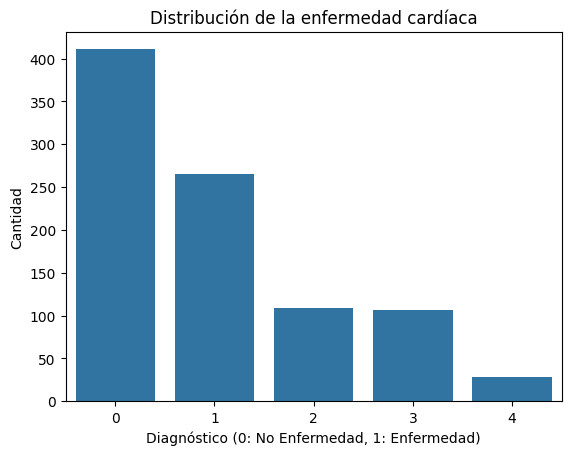

num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.countplot(x=df['num'])
plt.title('Distribución de la enfermedad cardíaca')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Enfermedad)')
plt.ylabel('Cantidad')
plt.show()

# Porcentaje de cada clase
class_counts = df['num'].value_counts(normalize=True) * 100
print(class_counts)

Se observa un desequilibrio en la distribución de la variable objetivo, con una predominancia de la categoría 0 (sin enfermedad cardíaca), aunque hay varias clases (1, 2, 3, 4) con menos casos, lo cual podría afectar el desempeño del modelo.

Por lo cual se agrupara las clases para convertirlo en binario

In [ ]:
#(Enfermedad = 1) y mantener 0 como "No Enfermedad"
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Convertir la columna sex a formato numérico, 'Male' a 1 y 'Female' a 0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

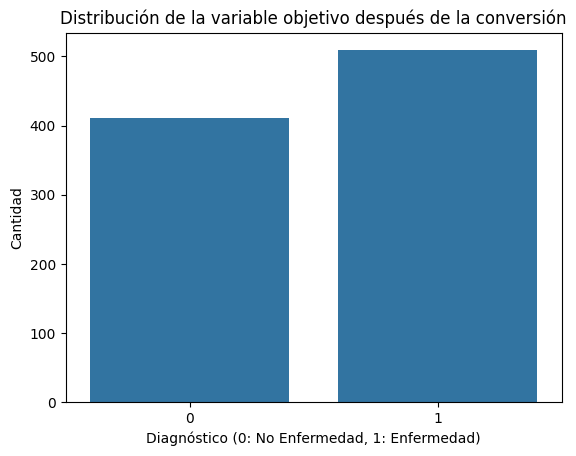

In [ ]:
# Verificar si la conversión de la variable num a binaria funcionó correctamente

sns.countplot(x=df['num'])
plt.title('Distribución de la variable objetivo después de la conversión')
plt.xlabel('Diagnóstico (0: No Enfermedad, 1: Enfermedad)')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separar caracteristicas (X) y variable objetivo (y)
columns_to_drop = categorical_cols + ['sex', 'num', 'dataset', 'id']
X = df_encoded.drop(columns=columns_to_drop, errors='ignore')
y = df_encoded['num']  # Target

# Division en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificación de distribucion despues de la division
print("Distribucion en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Distribucion en prueba:\n", y_test.value_counts(normalize=True))

Distribucion en entrenamiento:
 num
1    0.552989
0    0.447011
Name: proportion, dtype: float64
Distribucion en prueba:
 num
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Definir las columnas categóricas
categorical_cols = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

#3. Implementación de la MLP con Dropout:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir la arquitectura de la MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dropout(0.25),  # Dropout del 25%
    Dense(32, activation='relu'),  # Capa oculta 2
    Dropout(0.25),  # Dropout del 25%
    Dense(1, activation='sigmoid')  # Capa de salida binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5097 - loss: 0.7348 - val_accuracy: 0.7826 - val_loss: 0.6071
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7546 - loss: 0.5887 - val_accuracy: 0.8152 - val_loss: 0.5092
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7737 - loss: 0.5147 - val_accuracy: 0.8261 - val_loss: 0.4417
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8051 - loss: 0.4488 - val_accuracy: 0.8478 - val_loss: 0.4084
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 0.4511 - val_accuracy: 0.8478 - val_loss: 0.4036
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8096 - loss: 0.4382 - val_accuracy: 0.8370 - val_loss: 0.3999
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7940 - loss: 0.4506 - val_accuracy: 0.8424 - val_loss: 0.3962
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8292 - loss: 0.4086 - val_accuracy: 0.8370 - val_loss: 0.3911
Ep

#4. Entrenamiento del modelo:

In [ ]:
# Definir la arquitectura de la MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1 con 64 neuronas
    Dropout(0.25),  # Dropout con 25% de tasa para reducir sobreajuste
    Dense(32, activation='relu'),  # Capa oculta 2 con 32 neuronas
    Dropout(0.25),  # Otro dropout del 25%
    Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide para clasificación binaria
])

# Compilacion del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Definir Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Si la validación no mejora en 10 épocas consecutivas, el entrenamiento se detiene.

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # Se establecen hasta 100 épocas, pero early stopping puede detener el entrenamiento antes.
                    epochs=100, batch_size=32, # Se procesan 32 muestras por lote durante la actualización de pesos.
                    callbacks=[early_stop],
                    verbose=1)

# Evaluar el modelo después del entrenamiento
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5033 - loss: 0.6958 - val_accuracy: 0.7337 - val_loss: 0.5671
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7181 - loss: 0.5579 - val_accuracy: 0.7826 - val_loss: 0.4929
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7748 - loss: 0.4892 - val_accuracy: 0.8152 - val_loss: 0.4531
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7888 - loss: 0.4583 - val_accuracy: 0.8098 - val_loss: 0.4312
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8184 - loss: 0.4169 - val_accuracy: 0.8370 - val_loss: 0.4100
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8074 - loss: 0.4508 - val_accuracy: 0.8261 - val_loss: 0.3980
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8219 - loss: 0.4618 - val_accuracy: 0.8315 - val_loss: 0.3961
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8249 - loss: 0.4178 - val_accuracy: 0.8315 - val_loss: 0

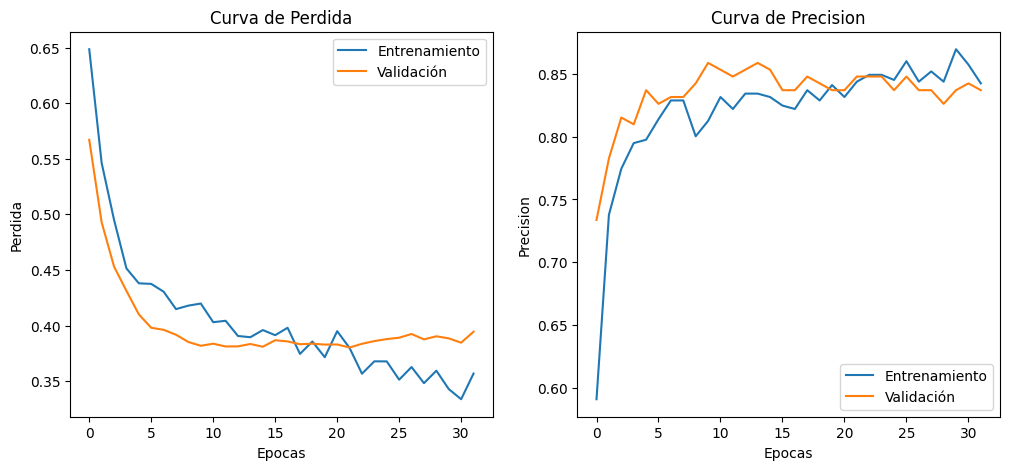

In [ ]:
# Visualizar las curvas de perdida y precision
plt.figure(figsize=(12, 5))

# Primer gráfico: pérdida durante entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.title('Curva de Perdida')
plt.legend()

# Segundo gráfico: precisión durante entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.title('Curva de Precision')
plt.legend()

plt.show()

##Análisis de la Curva de Pérdida:

Parece que el modelo se ha estabilizado bien sin caer en sobreajuste significativo.

##Análisis de la Curva de Precisión:

La precisión del conjunto de validación es consistente, lo que indica que el modelo mantiene un buen desempeño sin caer en falsas expectativas.

#5. Evaluación del modelo:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Precisión: 0.8478
Precision: 0.8426
Recall: 0.8922
F1-score: 0.8667


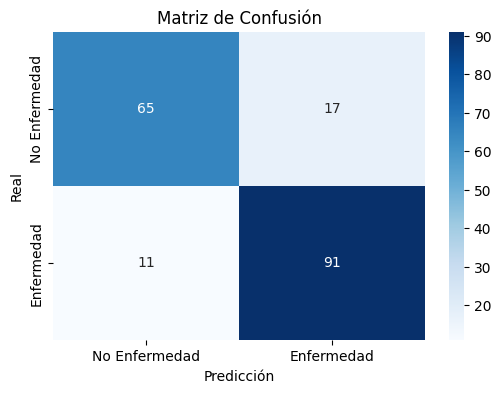

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generar predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int")

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar resultados
print(f"Precisión: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

##**Evaluacion del rendimiento**:

- Precision (accuracy) - El porcentaje de predicciones correctas es bastante alto.

- Precision (precision) - De los casos que el modelo predijo como "Enfermedad", el 84.26% realmente lo tenían.

- Recall (recall) - El modelo detecta bien la mayoria de los pacientes con enfermedad.

- F1-score (F1) - Balance entre precision y recall, mostrando que el modelo tiene un rendimiento solido.


##Analisis de la matriz de confusion:

- Verdaderos Positivos (91) - Casos correctamente identificados como enfermedad.

- Falsos Positivos (17) - Casos predichos como enfermedad, pero en realidad no la tenian.

- Falsos Negativos (11) - Casos con enfermedad que el modelo no detecto.

- Verdaderos Negativos (65) - Pacientes correctamente identificados como sanos.

En conclusion el modelo parece optimizado para detectar la enfermedad (recall alto).

##**Uso de dropout y early stopping**

Comparado con un MLP bAsico sin dropout ni early stopping:

- Dropout ha reducido el sobreajuste, permitiendo que el modelo generalice mejor a nuevos datos.

- Early Stopping ha prevenido sobreentrenamiento, manteniendo el mejor estado del modelo sin hacer que aprenda demasiado los datos de entrenamiento.

- Mayor estabilidad en validacion, evitando que la precision en prueba decaiga, como ocurriria en un modelo sin regularizacion.